In [3]:
import pymongo
import pandas as pd
from pymongo import MongoClient
from random import random
import json

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [1]:
def _connect_mongo(host, port, db):
    conn = MongoClient(host, port)
    return conn[db]

def read_mongo(db, collection, query={}, host='localhost', port=27017, no_id=True):
    """ Read from Mongo and Store into DataFrame """
    db = _connect_mongo(host=host, port=port, db=db)
    cursor = db[collection].find(query)
    df = pd.DataFrame(list(cursor))
    if no_id:
        del df['_id']
    return df

## Reading Data


In [ ]:
df_covid = read_mongo("itu", "covid_data")
df_country = read_mongo("itu", "country_info")

In [ ]:
df = df_country.merge(df_covid, on='location', how='left')

df = df[['continent','location','date','total_cases','new_cases',
         'new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed',
         'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
         'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
         'reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients',
         'hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
         'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests',
         'total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand',
         'positive_rate','tests_per_case','tests_units','total_vaccinations','people_vaccinated','people_fully_vaccinated',
         'new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
         'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','stringency_index','population',
         'population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita',
         'cardiovasc_death_rate','diabetes_prevalence','handwashing_facilities',
         'hospital_beds_per_thousand','life_expectancy','human_development_index']]

del df_covid, df_country

data = df.copy()

In [127]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245070,ZWE,Africa,Zimbabwe,2022-12-20,259981.0,625.0,89.286,5637.0,15.0,2.143,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
245071,ZWE,Africa,Zimbabwe,2022-12-21,259981.0,NaN,NaN,5637.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
245072,ZWE,Africa,Zimbabwe,2022-12-22,259981.0,NaN,NaN,5637.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
245073,ZWE,Africa,Zimbabwe,2022-12-23,259981.0,NaN,NaN,5637.0,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [128]:
df = data[['continent','location','date','total_cases','new_cases',
         'new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed',
         'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
         'total_deaths_per_million','new_deaths_per_million','new_deaths_smoothed_per_million',
         'reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients',
         'hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
         'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests','new_tests',
         'total_tests_per_thousand','new_tests_per_thousand','new_tests_smoothed','new_tests_smoothed_per_thousand',
         'positive_rate','tests_per_case','tests_units','total_vaccinations','people_vaccinated','people_fully_vaccinated',
         'new_vaccinations','new_vaccinations_smoothed','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
         'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','stringency_index','population',
         'population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita',
         'cardiovasc_death_rate','diabetes_prevalence','handwashing_facilities',
         'hospital_beds_per_thousand','life_expectancy','human_development_index']]



df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511


In [129]:
date_validation = "2022-11-07"

df = df[df['date'] < date_validation].copy()


In [130]:
df['date'] = pd.to_datetime(df.date)


In [131]:
for i in df.loc[:, df.columns != 'tests_units'].columns[3:]:
    df[i] = df[i].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233648 entries, 0 to 245026
Data columns (total 55 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   continent                              220494 non-null  object        
 1   location                               233648 non-null  object        
 2   date                                   233648 non-null  datetime64[ns]
 3   total_cases                            219924 non-null  float64       
 4   new_cases                              219761 non-null  float64       
 5   new_cases_smoothed                     218565 non-null  float64       
 6   total_deaths                           200671 non-null  float64       
 7   new_deaths                             200657 non-null  float64       
 8   new_deaths_smoothed                    199477 non-null  float64       
 9   total_cases_per_million                218920 no

In [132]:
df.replace({None: 0}, inplace = True)
df.set_index('date',inplace = True)

In [133]:
df

,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-02-24,Asia,Afghanistan,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2020-02-25,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2020-02-26,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2020-02-27,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
2020-02-28,Asia,Afghanistan,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,...,18.6,2.581,1.337,1803.987,597.029,9.59,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-02,Africa,Zimbabwe,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.745,0.000,...,19.6,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
2022-11-03,Africa,Zimbabwe,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.745,0.000,...,19.6,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571
2022-11-04,Africa,Zimbabwe,257893.0,0.0,0.0,5606.0,0.0,0.0,15801.745,0.000,...,19.6,2.822,1.882,1899.775,307.846,1.82,36.791,1.7,61.49,0.571


## Explanatory Data Analysis

In [134]:
import plotly.express as px
import seaborn as sns

### Data Description

To examine the properties of the dataset, I applied the describe function to the object and float columns separately.

In [73]:
df.select_dtypes("object").describe()

,continent,location,tests_units
count,233648,233648,233648
unique,7,248,5
top,Europe,Argentina,0
freq,53502,1041,126860


In [74]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,2.199240e+05,2.197610e+05,2.185650e+05,2.006710e+05,200657.000000,199477.000000,218920.000000,218757.000000,217566.000000,199680.000000,...,188311.000000,186324.000000,187326.000000,187774.000000,187795.000000,197488.000000,92479.000000,167202.000000,214311.000000,183267.000000
mean,4.542070e+06,1.228828e+04,1.233416e+04,7.472686e+04,136.672551,137.357646,61555.572240,187.515345,188.142322,695.668254,...,30.609078,8.799018,5.550624,19542.612062,261.480102,8.387848,50.915794,3.088701,73.618394,0.724758
std,2.834763e+07,8.486543e+04,8.294492e+04,3.838271e+05,724.615589,710.243511,108683.000721,1147.551217,685.233591,980.120575,...,9.062527,6.125241,4.161267,20534.494726,120.232731,4.736196,31.879062,2.552005,7.445614,0.149606
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,15.100000,1.144000,0.526000,661.240000,79.370000,0.990000,1.188000,0.100000,53.280000,0.394000
25%,4.563000e+03,0.000000e+00,5.857000e+00,1.140000e+02,0.000000,0.000000,1107.932000,0.000000,1.273000,29.682000,...,22.300000,3.526000,2.063000,4449.898000,170.050000,5.310000,20.859000,1.300000,69.500000,0.602000
50%,5.068450e+04,5.200000e+01,9.200000e+01,1.201000e+03,1.000000,1.429000,10491.764500,7.046000,18.708000,215.843500,...,30.600000,6.704000,4.032000,12951.839000,243.964000,7.200000,49.839000,2.500000,75.050000,0.742000
75%,5.347918e+05,9.410000e+02,1.113143e+03,9.912500e+03,14.000000,15.429000,73696.149250,94.816000,133.512000,1030.252000,...,39.100000,14.178000,8.678000,27936.896000,329.942000,10.590000,83.241000,4.200000,79.070000,0.845000
max,6.328877e+08,4.083950e+06,3.439392e+06,6.602901e+06,17733.000000,14859.286000,672608.585000,228872.025000,36421.827000,6375.408000,...,48.200000,27.049000,18.493000,116935.600000,724.417000,30.530000,100.000000,13.800000,86.750000,0.957000


## Correlation Analysis

Since there are too many columns in the dataframe, I could not observe the correlations with the df.coor() method. When I removed the highly correlated columns that we calculated with the df.corr() method from the dataframe, I observed that the model performances decreased, so we did not apply this process. To examine the correlation between the dependent variables and the target variable, I examined the 25 columns with the highest correlation with the new_cases variable.

In [75]:
correlations = {}

for column in df.columns:
    if column in ["tests_units","date","location","continent"] :
        continue
    correlation = df[column].corr(df["new_cases"])
    correlations[column] = correlation

sorted_dict = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

for i in range(25):
    key, value = sorted_dict[i]
    print(key,":",value)

new_cases : 1.0
new_cases_smoothed : 0.973181184909045
total_deaths : 0.7108289934993826
hosp_patients : 0.7090698069982018
total_cases : 0.6819113696100667
weekly_hosp_admissions : 0.6784334408318821
new_deaths : 0.6449092300520353
new_deaths_smoothed : 0.6320398207897783
people_vaccinated : 0.5716136886179652
icu_patients : 0.5673280726221489
people_fully_vaccinated : 0.5616864880945197
total_vaccinations : 0.5553363899688302
new_tests : 0.5469013514204351
population : 0.5423154307602437
new_vaccinations_smoothed : 0.5095231391379189
new_vaccinations : 0.4890245242211392
total_tests : 0.44609514800079497
weekly_icu_admissions : 0.4313601127654774
weekly_hosp_admissions_per_million : 0.29382054842835525
positive_rate : 0.17740734169853
icu_patients_per_million : 0.15450136977175205
hosp_patients_per_million : 0.1438186419619965
weekly_icu_admissions_per_million : 0.1186389319711456
new_tests_smoothed : 0.08296266034861
total_vaccinations_per_hundred : 0.07831641528673311


## Observing the new_case based on dates

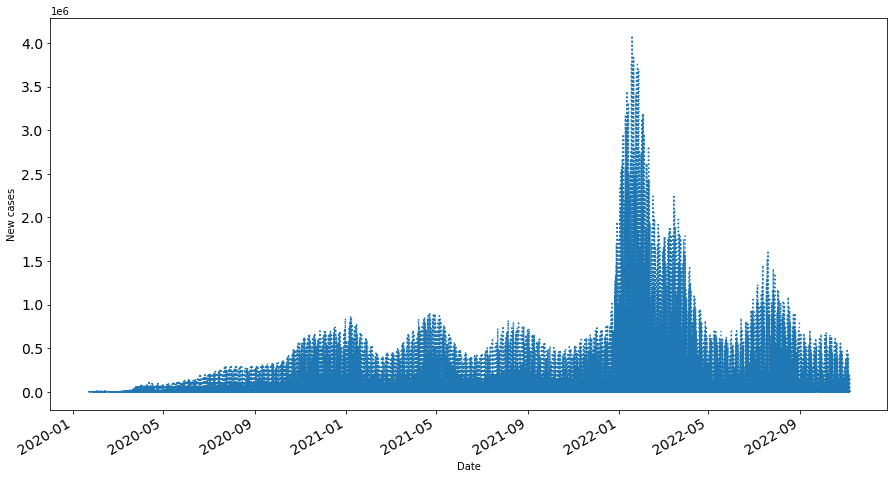

In [76]:
df["new_cases"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "New_cases")
plt.xlabel("Date",fontsize = 10)
plt.ylabel('New cases',fontsize = 10)
plt.show()






## Examination of the sum of new_cases by locations

In [77]:
top20_location = pd.DataFrame(df.groupby('location')['new_cases'].sum().nlargest(20).sort_values(ascending = True))
fig2 = px.bar(top20_location, x = 'new_cases', y = top20_location.index, height = 600, color = 'new_cases', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 20 Total Cases Locations')
fig2.show()

## Comparison of new_cases_per_million and new_vaccinations_smoothed_per_million

We made this visualization to see the relationship between the vaccination rate and the new_case rate. We observed that the new_case ratio increased during periods where the vaccination rate decreased.

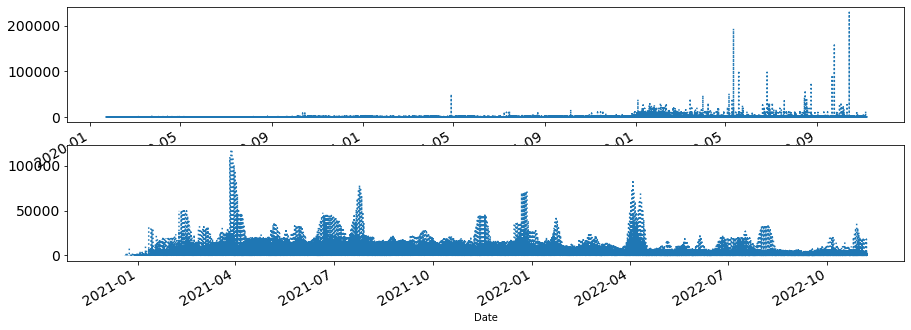

In [78]:
plt.subplot(3, 1, 1)
df["new_cases_per_million"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "New_cases_per_million")

plt.subplot(3, 1, 2)
df["new_vaccinations_smoothed_per_million"].plot(figsize=(15,8), fontsize=14,linestyle='dotted',label = "new_vaccinations_smoothed_per_million")


plt.xlabel("Date",fontsize = 10)

plt.show()

## Observing new_case values according to test_performed values

<AxesSubplot:xlabel='date'>

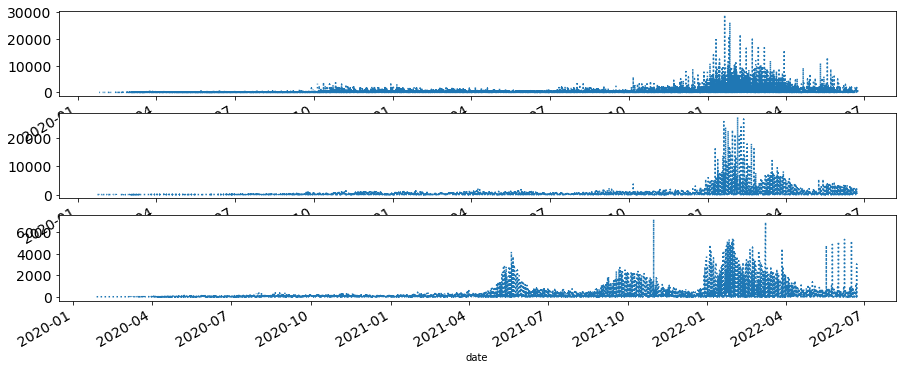

In [79]:



plt.subplot(4, 1, 1)
df[df["tests_units"]=="tests performed"]["new_cases_per_million"].plot(figsize=(15,8), fontsize=14,linestyle='dotted')

plt.subplot(4, 1, 2)
df[df["tests_units"]=="people tested"]["new_cases_per_million"].plot(figsize=(15,8), fontsize=14,linestyle='dotted')

plt.subplot(4, 1, 3)
df[df["tests_units"]=="samples tested"]["new_cases_per_million"].plot(figsize=(15,8), fontsize=14,linestyle='dotted')


## Feature Extraction

In [80]:
df['new_cases_avg_3g'] = df.groupby('location')['new_cases'].rolling(3, min_periods=1).mean().reset_index(0,drop=True)

In [81]:
df['daily_death_ratio'] = round(df['new_deaths']/df['total_deaths'],5)

- Since population density is effective for the spread of the virus, I produced a new variable by multiplying the new case with the population density columns.


In [82]:
df["positive_density"] =  df["new_cases"]*df["population_density"]

- Since the number of cases is related to the previous days, I added the Relative Strength Index information to obtain information about the direction of change in the number of cases.

In [83]:
df['Diff'] = df.groupby("location")['new_cases'].transform(lambda x: x.diff())
df['Up'] = df['Diff']
df.loc[(df['Up']<0), 'Up'] = 0

df['Down'] = df['Diff']
df.loc[(df['Down']>0), 'Down'] = 0 
df['Down'] = abs(df['Down'])

df['avg_5up'] = df['Up'].transform(lambda x: x.rolling(window=5).mean())
df['avg_5down'] = df['Down'].transform(lambda x: x.rolling(window=5).mean())

df['avg_15up'] = df['Up'].transform(lambda x: x.rolling(window=14).mean())
df['avg_15down'] = df['Down'].transform(lambda x: x.rolling(window=14).mean())

df['RS_5'] = df['avg_5up'] / df['avg_5down']
df['RS_15'] = df['avg_15up'] / df['avg_15down']

df['RSI_5'] = 100 - (100/(1+df['RS_5']))
df['RSI_15'] = 100 - (100/(1+df['RS_15']))


df.drop("RS_5",axis = 1 ,inplace = True)
df.drop("RS_15",axis = 1 ,inplace = True)




- By applying the Exponentially Weighted Moving Average function to the new cases and positive density variables I created, I added exponential average information to our dataset.

In [84]:
df['5Ewm'] = df.groupby("location")['new_cases'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
df['15Ewm'] = df.groupby("location")['new_cases'].transform(lambda x: x.ewm(span=15, adjust=False).mean())

In [85]:
df['den_5Ewm'] = df.groupby("location")['positive_density'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
df['den_15Ewm'] = df.groupby("location")['positive_density'].transform(lambda x: x.ewm(span=15, adjust=False).mean())

In [86]:
df['15MA'] = df.groupby('location')['new_cases'].transform(lambda x: x.rolling(window=15).mean())
df['SD'] = df.groupby('location')['new_cases'].transform(lambda x: x.rolling(window=15).std())
df['upperband'] = df['15MA'] + 2*df['SD']
df['lowerband'] = df['15MA'] - 2*df['SD']

## Model

In [87]:
df = df.dropna(how='all', axis=0)
df = df.fillna(0)

In [88]:
df['TARGET'] = df.groupby('location')['new_cases'].shift(-1) ## Tomorrow's case will be our prediction
df.dropna(subset=['TARGET'], inplace = True)

- I assigned the data in the date range that I will make predictions for Turkey to the df_tr variable

In [89]:
date_start_test = '2022-04-01'   
date_start_forecast = '2022-11-01'
date_validation = "2022-11-07"


df_tr =  df.loc[date_start_forecast:date_validation].copy()
df = df.loc[ :date_start_forecast].copy()

In [136]:
df["continent"] = df["continent"].astype("str")
df["tests_units"] = df["tests_units"].astype("str")

In [137]:
categ = ["continent",'location',"tests_units"]

le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [96]:
df_train = df.loc[ :date_start_test].copy()
df_test = df.loc[date_start_test: date_start_forecast].copy()

In [97]:
X_train = df_train.drop("TARGET",axis = 1)
y_train = df_train["TARGET"]

In [98]:
X_test = df_test.drop("TARGET",axis = 1)
y_test = df_test["TARGET"]

In [99]:
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error


## Linear Regression

In [112]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

y_pred_lr = reg.predict(X_test)
r2_lr = r2_score(y_test,y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print("R2 score:", r2_lr)
print("MAE:", mae_lr)
print("MAPE:", mape_lr)

R2 score: 0.917314746373746
MAE: 4146.77928063483
MAPE: 3.0347560551352996e+18


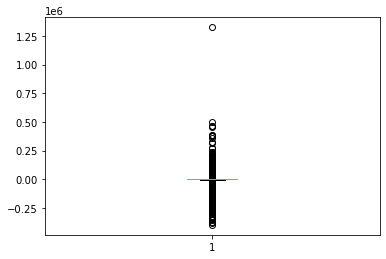

In [113]:
errors = y_test - y_pred_lr

plt.boxplot(errors)

plt.show()

- I obtained a high r squared value from linear regression. I will compare MAE and MAPE values with other models.

## Decision Trees

In [142]:
from sklearn import tree
tree= tree.DecisionTreeRegressor()
tree =tree.fit(X_train, y_train)

y_pred_dt = tree.predict(X_test)
r2_dt = r2_score(y_test,y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)

print("R2 score:", r2_dt)
print("MAE:", mae_dt)
print("MAPE:", mape_dt)

R2 score: 0.705544174572418
MAE: 5955.759722925657
MAPE: 2.910005582988089e+18


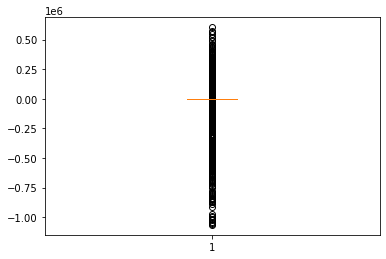

In [143]:
errors_ada = y_test - y_pred_ada
plt.boxplot(errors_ada)

plt.show()

## Ridge Regression

In [102]:
from sklearn.linear_model import Ridge
rdg = Ridge(alpha=1.0)
rdg.fit(X_train, y_train)
y_pred_ridge = rdg.predict(X_test)

r2_ridge = r2_score(y_test,y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)

print("R2 score:", r2_ridge)
print("MAE:", mae_ridge)
print("MAPE:", mape_ridge)

R2 score: 0.9173147562242651
MAE: 4146.780363407316
MAPE: 3.034761118648566e+18


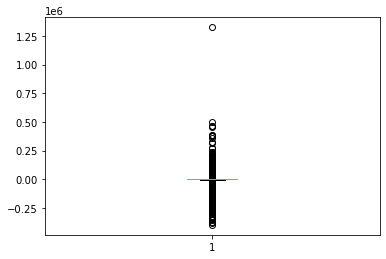

In [103]:
errors_ridge = y_test - y_pred_ridge
plt.boxplot(errors_ridge)

plt.show()

- Ridge regression gave similar results as linear regression.

## ElasticNet Regression

In [104]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(alpha=0.1)
elastic = regr.fit(X_train,y_train)
y_pred_el_net = elastic.predict(X_test)

r2_el_net = r2_score(y_test,y_pred_el_net)
mae_el_net = mean_absolute_error(y_test, y_pred_el_net)
mape_el_net = mean_absolute_percentage_error(y_test, y_pred_el_net)

print("R2 score:", r2_el_net)
print("MAE:", mae_el_net)
print("MAPE:", mape_el_net)

R2 score: 0.8638775930291193
MAE: 5281.85941094859
MAPE: 3.169239028251096e+18


C:\Users\Hasan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.659e+13, tolerance: 1.337e+11



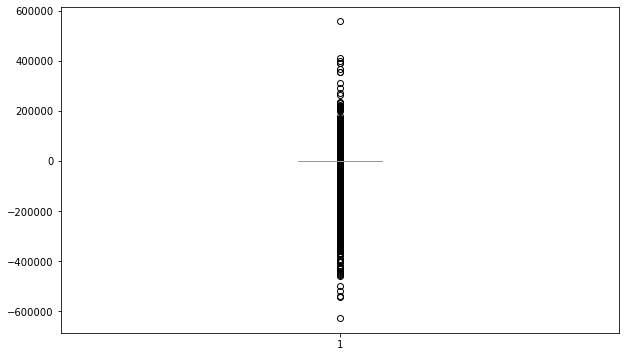

In [105]:
errors_el_net = y_test - y_pred_el_net
plt.figure(figsize=(10, 6))
plt.boxplot(errors_el_net)

plt.show()

- ElasticNet performed worse than linear regression and ridge regression

## XGBoost

In [114]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

xgb_r.fit(X_train,y_train)

y_pred_xgb = xgb_r.predict(X_test)

r2_xgb = r2_score(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("R2 score:", r2_xgb)
print("MAE:", mae_xgb)
print("MAPE:", mape_xgb)


[14:52:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
R2 score: 0.8836145580142947
MAE: 4048.6134046791135
MAPE: 2.0135983231675538e+18


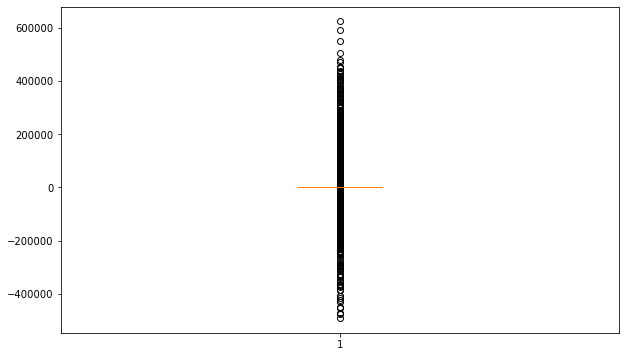

In [107]:
errors_xgb = y_test - y_pred_xgb
plt.figure(figsize=(10, 6))
plt.boxplot(errors_xgb)

plt.show()

- When I look at the scores I obtained from Xgboost, the r square value is lower than the linear regression and ridge regression models, but when I look at the MAE value, I see that it predicts with less error difference. Therefore, I decided to use the XGBoost model to forecast the turkey data.

## Parameter setting XGBoost

I used the gridsearchcv method to find the parameters that the xgboost algorithm will perform best. In order to perform crossvalidation, I combined the X_train and X_test data again and obtained the model parameters..

In [126]:
parameters = {
              'objective':['reg:linear'],
              'seed': [123,130,140],
              'n_estimators':[10,20,30,40]
        
              }



cv = [(slice(None), slice(None))]
xgb_grid = GridSearchCV(xgb_r,
                        parameters,
                        scoring='neg_mean_absolute_error',
                        cv = cv,
                        n_jobs = -1,
                        verbose=True)

In [127]:
xgb_grid.fit(X_train,y_train)

Fitting 1 folds for each of 12 candidates, totalling 12 fits
[21:16:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[21:16:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interac...
                                    max_cat_threshold=64, max_cat_to_onehot=4,
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimator=10,
                                    n_estimators=100, n_jobs=0,
                                    num_parallel_tree=1, objective='reg:linear', ...),
             n_jobs=-1,
             param_grid={'n_estimators': [10, 20, 30, 40],
                         'objective': ['reg:linear'], 'seed': [123, 130, 140]},
             scoring='neg_mean_absolute_error', verbose=True)

In [128]:
param = xgb_grid.best_params_
param

{'n_estimators': 40, 'objective': 'reg:linear', 'seed': 123}

### Reconstruction of the model with the parameters we obtained

In [141]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                        n_estimators = 40,
                        learning_rate= 0.07,
                        seed = 123
                        )


xgb_r.fit(X_train,y_train)

y_pred_xgb = xgb_r.predict(X_test)

r2_xgb = r2_score(y_test,y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("R2 score:", r2_xgb)
print("MAE:", mae_xgb)
print("MAPE:", mape_xgb)

[15:20:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
R2 score: 0.8983841894016089
MAE: 3802.3143811556674
MAPE: 1.9164481141616755e+18


## Final Scores

In [145]:
scr ={"r_2":[r2_lr,r2_dt,r2_ridge,r2_el_net,r2_xgb],
      "MAE":[mae_lr,mae_dt,mae_ridge,mae_el_net,mae_xgb],
     "MAPE":[mape_lr,mape_dt,mape_ridge,mape_el_net,mape_xgb]}

scr_df = pd.DataFrame(scr,index=["Linear Regression","Decision Trees","Ridge Regression","ElasticNet","XGBoost"])
scr_df

,r_2,MAE,MAPE
Linear Regression,0.917315,4146.779281,3.034756e+18
Decision Trees,0.705544,5955.759723,2.910006e+18
Ridge Regression,0.917315,4146.780363,3.034761e+18
ElasticNet,0.863878,5281.859411,3.169239e+18
XGBoost,0.898384,3802.314381,1.916448e+18


## Turkey data

In [116]:
df_tr_y = df_tr[df_tr["location"]=="Turkey"]["TARGET"].copy()
df_tr_x = df_tr[df_tr["location"]=="Turkey"].drop("TARGET",axis = 1).copy()


- I applied the same process to Turkey Data.

In [117]:
df_tr_x["continent"] = df_tr_x["continent"].astype("str")
df_tr_x["tests_units"] = df_tr_x["tests_units"].astype("str")

categ = ["continent",'location',"tests_units"]

le = LabelEncoder()
df_tr_x[categ] = df_tr_x[categ].apply(le.fit_transform)

df_tr_x = df_tr_x.astype("float64")

- I fitted the model with the parameters tuned and got the scores.

In [123]:
y_pred_tr = xgb_r.predict(df_tr_x)
r2_tr = r2_score(df_tr_y,y_pred_tr)
mae_tr = mean_absolute_error(df_tr_y, y_pred_tr)
mape_tr = mean_absolute_percentage_error(df_tr_y, y_pred_tr)

print("R2 score:", r2_tr)
print("MAE:", mae_tr)
print("MAPE:", mape_tr)

R2 score: 0.0
MAE: 133.04365234375
MAPE: 5.991753431193224e+17


- Since the variance of the new_case data for Turkey between 1-7 December was 0, I could not use the r square value as an evaluation metric. I see that the model predicts the true values with an average of 122.4 errors.

In [119]:
y_pred_tr

array([257.00027, 102.0545 , 102.0545 , 102.0545 , 102.0545 ],
      dtype=float32)

In [101]:
xgb_r.feature_importances_

array([1.6618423e-04, 2.4911218e-05, 8.7069307e-04, 8.4499121e-02,
       2.6837608e-01, 7.2277494e-04, 1.3541548e-03, 7.6147274e-04,
       3.7405174e-02, 2.5763302e-04, 7.7978283e-04, 5.8997362e-03,
       1.5327246e-03, 1.4891691e-03, 1.9961323e-04, 3.0237105e-04,
       2.1272572e-04, 5.2467780e-04, 9.7388023e-05, 4.7568345e-04,
       6.6626578e-04, 5.7663198e-04, 5.6906190e-04, 9.5692303e-05,
       2.5372769e-04, 3.0248918e-04, 1.9960504e-05, 2.5598949e-04,
       7.5528905e-04, 6.1886077e-04, 3.9647863e-04, 0.0000000e+00,
       9.5176214e-04, 0.0000000e+00, 8.3311978e-05, 1.5764104e-03,
       4.2074528e-03, 5.8862222e-03, 1.2205114e-03, 6.1020761e-04,
       3.2135656e-03, 0.0000000e+00, 3.3252800e-04, 1.6622241e-04,
       1.5350338e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.0874127e-04, 0.0000000e+00, 1.1605333e-01, 2.4714854e-03,
       8.0533475e-02, 1.8939786e-03, 9.0380799e-04, 1.8035218e